## Agenda
- Decision Tree
- Desion Tree Terminologies


## 2 types
- Decision tree Classifier(Catogorical Data)
- Decision tree Regressor(Continuous Data)

### Decision tree follows 2 Algorithems
- CART(Clasification and Regression)-Gini index 
- Id3(Iterative dechotomiser 3)- Entropy and Information gain

### Decision tree Classifier(Catogorical Data)
- It is for graphical representation
- Entropy- to meause the impurity
- Information Gain -Avg of entropy
- Gini Index- best display of graph

In [3]:
## root
## parent node
# child node
# branch
# leaf

In [4]:
import pandas as pd

In [41]:
df=pd.read_csv("https://raw.githubusercontent.com/AP-State-Skill-Development-Corporation/Datasets/master/Classification/titanic.csv")
df.head()

,survived,pclass,name,sex,age,sibsp,parch,ticket,fare,cabin,embarked
0,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [42]:
df.shape

(891, 11)

In [43]:
df.drop(["name","sibsp","parch","ticket","cabin","embarked"],axis="columns",inplace=True)

In [44]:
df

,survived,pclass,sex,age,fare
0,0,3,male,22.0,7.2500
1,1,1,female,38.0,71.2833
2,1,3,female,26.0,7.9250
3,1,1,female,35.0,53.1000
4,0,3,male,35.0,8.0500
...,...,...,...,...,...
886,0,2,male,27.0,13.0000
887,1,1,female,19.0,30.0000
888,0,3,female,NaN,23.4500
889,1,1,male,26.0,30.0000


In [45]:
x=df.drop("survived",axis="columns")
y=df["survived"]
x

,pclass,sex,age,fare
0,3,male,22.0,7.2500
1,1,female,38.0,71.2833
2,3,female,26.0,7.9250
3,1,female,35.0,53.1000
4,3,male,35.0,8.0500
...,...,...,...,...
886,2,male,27.0,13.0000
887,1,female,19.0,30.0000
888,3,female,NaN,23.4500
889,1,male,26.0,30.0000


In [46]:
# data pre processing
x.sex=x.sex.map({"female":1,"male":2})
x

,pclass,sex,age,fare
0,3,2,22.0,7.2500
1,1,1,38.0,71.2833
2,3,1,26.0,7.9250
3,1,1,35.0,53.1000
4,3,2,35.0,8.0500
...,...,...,...,...
886,2,2,27.0,13.0000
887,1,1,19.0,30.0000
888,3,1,NaN,23.4500
889,1,2,26.0,30.0000


In [47]:
x.age=x.age.fillna(x.age.mean())
x

,pclass,sex,age,fare
0,3,2,22.000000,7.2500
1,1,1,38.000000,71.2833
2,3,1,26.000000,7.9250
3,1,1,35.000000,53.1000
4,3,2,35.000000,8.0500
...,...,...,...,...
886,2,2,27.000000,13.0000
887,1,1,19.000000,30.0000
888,3,1,29.699118,23.4500
889,1,2,26.000000,30.0000


In [48]:
from sklearn.model_selection import train_test_split
x_tr,x_te,y_tr,y_te=train_test_split(x,y,test_size=0.2,random_state=3)

In [49]:
# call the model
from sklearn.tree import DecisionTreeClassifier
m=DecisionTreeClassifier()
m.fit(x_tr,y_tr)

DecisionTreeClassifier(ccp_alpha=0.0, class_weight=None, criterion='gini',
                       max_depth=None, max_features=None, max_leaf_nodes=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, presort='deprecated',
                       random_state=None, splitter='best')

In [55]:
m.predict([['3','2','32.000000','7.7500']])

array([0], dtype=int64)

In [50]:
# grphviz-used to download and display the tree in your system  ->.(dot)
# pydot plus-convert the dot file in to image

In [51]:
pip install graphviz

Note: you may need to restart the kernel to use updated packages.


In [52]:
pip install pydotplus

Note: you may need to restart the kernel to use updated packages.


In [60]:
from sklearn.externals.six import StringIO
from sklearn.tree import export_graphviz
import pydotplus
from IPython.display import Image

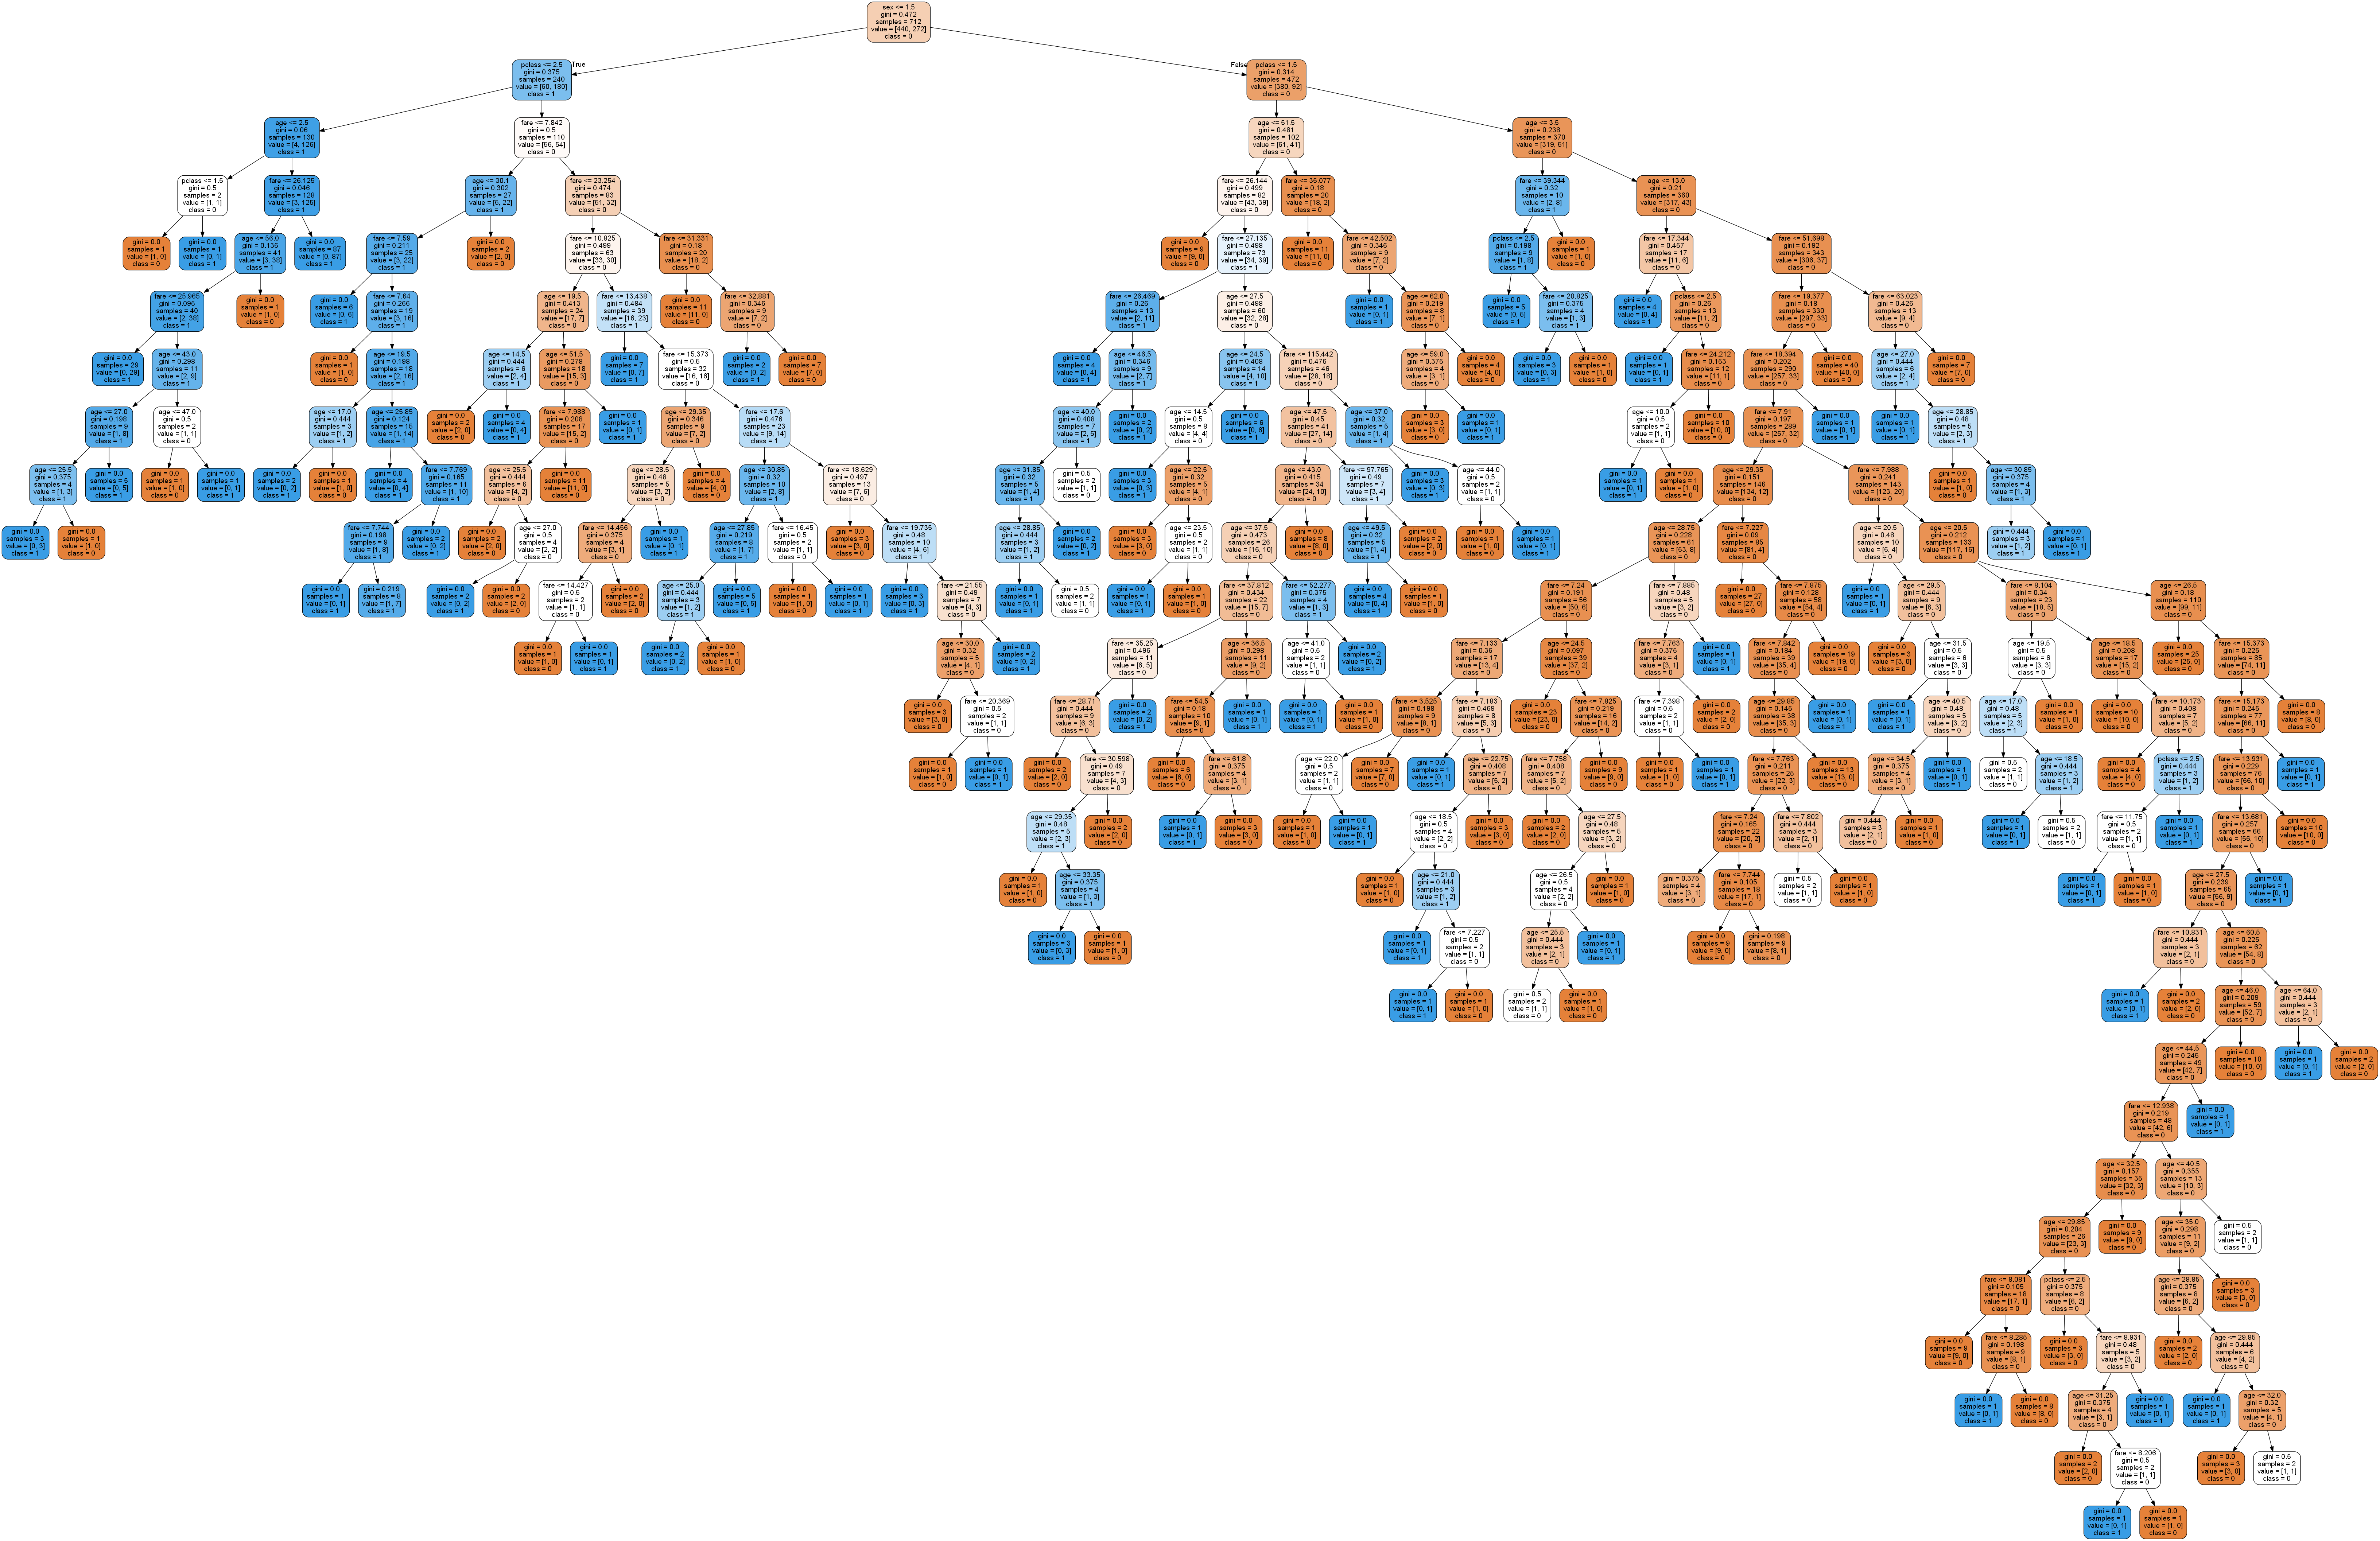

In [61]:
data=StringIO()
export_graphviz(m,out_file=data,filled=True,rounded=True,
                feature_names=x.columns,class_names=["0","1"])
g=pydotplus.graph_from_dot_data(data.getvalue())
Image(g.create_png())

In [63]:
from sklearn.metrics import accuracy_score,confusion_matrix
y_pred=m.predict(x_te)
accuracy_score(y_te,y_pred)

0.7821229050279329

In [65]:
confusion_matrix(y_te,y_pred)

array([[88, 21],
       [18, 52]], dtype=int64)

In [74]:
d=pd.DataFrame([[23,35,"dog"],[56,78,"cat"],[56,36,"dog"],[56,38,"cat"],[55,77,"cat"]])
d.columns=["hight","wight","label"]
d

,hight,wight,label
0,23,35,dog
1,56,78,cat
2,56,36,dog
3,56,38,cat
4,55,77,cat


In [76]:
x=d[["hight","wight"]]
y=d["label"]

In [81]:
from sklearn.tree import DecisionTreeClassifier
m=DecisionTreeClassifier(criterion='entropy',splitter='random')
m.fit(x,y)

DecisionTreeClassifier(ccp_alpha=0.0, class_weight=None, criterion='entropy',
                       max_depth=None, max_features=None, max_leaf_nodes=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, presort='deprecated',
                       random_state=None, splitter='random')

In [82]:
from sklearn.externals.six import StringIO
from sklearn.tree import export_graphviz
import pydotplus
from IPython.display import Image

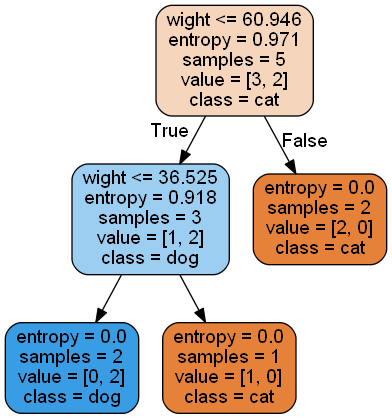

In [83]:
data=StringIO()
export_graphviz(m,out_file=data,filled=True,rounded=True,
                feature_names=x.columns,class_names=["cat","dog"])
g=pydotplus.graph_from_dot_data(data.getvalue())
Image(g.create_png())